In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9],[1.9,2.2],[3.1,3],[2.3,2.7],[2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]])
print(A.shape)
# calculate the mean of each column
M = mean(A.T, axis=1)
print()
print(M)
# center columns by subtracting column means
C = A - M
print(C)
import matplotlib.pyplot as plt


(10, 2)

[1.81 1.91]
[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]


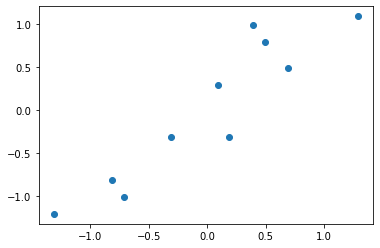

In [2]:
plt.scatter(C[:,0],C[:,1])

In [3]:
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


In [4]:
##Calculate eigvector(V) for projection

import numpy as np

# Calculate eigenvalues and eigenvectors of the covariance matrix V
eigvalues, eigvector = np.linalg.eig(V)


##Pick the higest Eign vector
# Sort eigenvalues in descending order and get the indices
idx = eigvalues.argsort()[::-1]

# Reorder eigenvalues and eigenvectors based on sorted indices
eigvalues = eigvalues[idx]
eigvector = eigvector[:, idx]

# Extract the first principal component (eigenvector corresponding to the largest eigenvalue)
eig1 = eigvector[:, :1]

# Extract the remaining principal components (eigenvectors after the first)
eig2 = eigvector[:, 1:]

In [5]:
print(eigvector)

[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


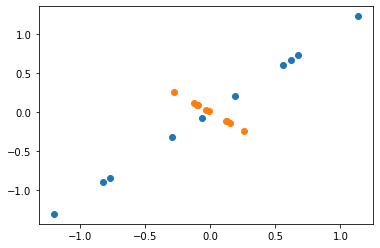

In [6]:
# Project the centered data onto the first principal component
Z1 = np.dot(C, eig1)

# Project the centered data onto the second principal component
Z2 = np.dot(C, eig2)

# Project the centered data onto all principal components
Z = np.dot(C, eigvector)

# Print the transformed data matrix Z, where each row represents a data point in PCA space
print(Z)

# Reconstruct the data along the first principal component
PC1 = Z1 * eig1.T

# Reconstruct the data along the second principal component
PC2 = Z2 * eig2.T

# Scatter plot for the projections of the data along the first principal component
plt.scatter(PC1[:, 0], PC1[:, 1])

# Scatter plot for the projections of the data along the second principal component
plt.scatter(PC2[:, 0], PC2[:, 1])

In [12]:
## PCA through NumPy and Scikit-learn

# Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA()

# Fit the PCA model on the data matrix A
pca.fit(A)

# Access the principal components (eigenvectors)
# Each column corresponds to a principal component
print(pca.components_.T)  # Transpose to have eigenvectors as columns

# Access the first principal component (eigenvector corresponding to the largest eigenvalue)
print(pca.components_.T[:, 0:1])  # Extracting the first column (first principal component)



[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]
[[-0.6778734 ]
 [-0.73517866]]


In [8]:
print(pca.explained_variance_)   ##eigen Values
# transform data
B = pca.transform(A)
print()
print(B)   ##Length of vector projection

[1.28402771 0.0490834 ]

[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


In [9]:
print(pca.explained_variance_/np.sum(pca.explained_variance_))
print()
print(pca.explained_variance_ratio_)

[0.96318131 0.03681869]

[0.96318131 0.03681869]


In [10]:
##Do PCA on iris data set and findout how many componets capture 90% variability